<a href="https://colab.research.google.com/github/omdena/policy_pandemic/blob/master/policy_pandemic/OxfordDatasetAnalysis/task6_Mobility_daily_cases_relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import datetime
import warnings
warnings.filterwarnings('ignore')
import math

In [138]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.6.9.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.104+
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.3
numpy            : 1.18.4
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 46.3.0
Cython           : 0.29.17
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.2
IPython          : 5.5.0
pandas_datareader: 0.8.1
bs4              : 4.6.3
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.2.6
matplotlib   

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Global Mobility Data
# This is the Google Global Mobility Data updated upto 24th April'20
# Link for this dataset = https://drive.google.com/file/d/1Sk9j6vMnvPz95IMCNUUJB_HeyqJDCLdc/view?usp=sharing
link = '/content/drive/My Drive/Omdena/Global_Mobility_Report4.csv'
df = pd.read_csv(link, header=0, usecols = lambda column : column not in ["country_region_code", "sub_region_1" , "sub_region_2"], engine = 'python', parse_dates = True)

In [168]:
# Oxford Policy Dataset 
# Link = https://drive.google.com/open?id=1vTGSFHrf4U-fVr5rJg4BFarvMy9J2nne
link2 = '/content/drive/My Drive/Omdena/OxCGRT_Download_010520_230849_Full.csv'
policy_data = pd.read_csv(link2, header=0, index_col=['Date'], engine = 'python', parse_dates = True)
policy_data.fillna(0)

,CountryName,CountryCode,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,C2_Flag,C2_Notes,C3_Cancel public events,C3_Flag,C3_Notes,C4_Restrictions on gatherings,C4_Flag,C4_Notes,C5_Close public transport,C5_Flag,C5_Notes,C6_Stay at home requirements,C6_Flag,C6_Notes,C7_Restrictions on internal movement,C7_Flag,C7_Notes,C8_International travel controls,C8_Notes,E1_Income support,E1_Flag,E1_Notes,E2_Debt/contract relief,E2_Notes,E3_Fiscal measures,E3_Notes,E4_International support,E4_Notes,H1_Public information campaigns,H1_Flag,H1_Notes,H2_Testing policy,H2_Notes,H3_Contact tracing,H3_Notes,H4_Emergency investment in healthcare,H4_Notes,H5_Investment in vaccines,H5_Notes,M1_Wildcard,M1_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Aruba,ABW,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.00
2020-01-01,Afghanistan,AFG,0.0,0.0,https://en.unesco.org/themes/education-emergen...,0.0,0.0,"Form January 1 to March 25th, there were no cl...",0.0,0.0,0,0.0,0.0,0,0.0,0.0,"Prior to March 25, 2020, there were no restric...",0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.00
2020-01-01,Angola,AGO,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.00
2020-01-01,Albania,ALB,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.00
2020-01-01,Andorra,AND,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,Vietnam,VNM,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,270.0,0.0,0.0,78.31,0.0,87.14
2020-05-01,South Africa,ZAF,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,5647.0,103.0,0.0,91.40,0.0,92.38
2020-05-01,Zambia,ZMB,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,106.0,3.0,0.0,62.45,0.0,60.95


In [169]:
# Number of countries in Google Mobility Data
unique_value = df["country_region"].nunique() 
print(unique_value)
# List of countries
list_of_countries = df["country_region"].unique()
print(list_of_countries)

132
['United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda' 'Angola'
 'Argentina' 'Austria' 'Australia' 'Aruba' 'Bosnia and Herzegovina'
 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Benin' 'Bolivia' 'Brazil' 'The Bahamas' 'Botswana' 'Belarus' 'Belize'
 'Canada' 'Switzerland' "Côte d'Ivoire" 'Chile' 'Cameroon' 'Colombia'
 'Costa Rica' 'Cape Verde' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Estonia' 'Egypt' 'Spain' 'Finland' 'Fiji'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Guatemala'
 'Guinea-Bissau' 'Hong Kong' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'Ireland' 'Israel' 'India' 'Iraq' 'Italy' 'Jamaica' 'Jordan'
 'Japan' 'Kenya' 'Kyrgyzstan' 'Cambodia' 'South Korea' 'Kuwait'
 'Kazakhstan' 'Laos' 'Lebanon' 'Liechtenstein' 'Sri Lanka' 'Lithuania'
 'Luxembourg' 'Latvia' 'Libya' 'Moldova' 'North Macedonia' 'Mali'
 'Myanmar (Burma)' 'Mongolia' 'Malta' 'Mauritius' 'Mexico' 'Malaysia'
 'Mozambique' 'Namibia' 'Ni

In [170]:
# List of Countries in Oxford Dataset
list_of_countries_oxford = policy_data["CountryName"].unique()
print(list_of_countries_oxford)

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bosnia and Herzegovina'
 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Botswana'
 'Canada' 'Switzerland' 'Chile' 'China' 'Cameroon'
 'Democratic Republic of Congo' 'Colombia' 'Cape Verde' 'Costa Rica'
 'Cuba' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt' 'Spain'
 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon' 'United Kingdom' 'Ghana'
 'Gambia' 'Greece' 'Greenland' 'Guatemala' 'Guam' 'Guyana' 'Hong Kong'
 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iran'
 'Iraq' 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kazakhstan'
 'Kenya' 'Kyrgyz Republic' 'South Korea' 'Kuwait' 'Laos' 'Lebanon' 'Libya'
 'Sri Lanka' 'Lesotho' 'Luxembourg' 'Macao' 'Morocco' 'Moldova'
 'Madagascar' 'Mexico' 'Mali' 

In [171]:
# List of Common countries in Oxford and Mobility Dataset
def intersection(list1, list2): 
    countries_list = [value for value in list1 if value in list2] 
    return countries_list

plot_countries = intersection(list_of_countries, list_of_countries_oxford).copy()
print(plot_countries)
print(len(plot_countries))

['United Arab Emirates', 'Afghanistan', 'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Bolivia', 'Brazil', 'Botswana', 'Belize', 'Canada', 'Switzerland', 'Chile', 'Cameroon', 'Colombia', 'Costa Rica', 'Cape Verde', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain', 'Finland', 'France', 'Gabon', 'United Kingdom', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kenya', 'South Korea', 'Kuwait', 'Kazakhstan', 'Laos', 'Lebanon', 'Sri Lanka', 'Luxembourg', 'Libya', 'Moldova', 'Mali', 'Mongolia', 'Mauritius', 'Mexico', 'Malaysia', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Panama', 'Peru', 'Papua New Guinea', 'Philippines', 'Pakistan', 'Poland', 'Puerto Rico', 'Portug

In [0]:
# List of Dates for Plotting - x-axis
xdates = df.date.unique()
xdates = xdates.tolist()

In [173]:
df.head()

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [0]:
def modified_mobility_data(country_mobility_data,lag):
  
  #making new entries in mobility data from 15 april to lag date
  new_lag_rows=pd.DataFrame(country_mobility_data.iloc[1],columns=country_mobility_data.columns,index=[0])
  new_lag_rows=pd.concat([new_lag_rows.head(1)]*lag,ignore_index=True)

  #adjusting dates 
  missing_lag_dates=pd.date_range(start='2020-02-15',periods=lag)
  new_lag_rows['date']=missing_lag_dates

  #We need to lag the mobility data by "lag" no. of days 
  country_mobility_data['date']=pd.to_datetime(country_mobility_data['date'])+pd.tseries.offsets.DateOffset(days=lag)
  new_lag_rows['date']=pd.to_datetime(new_lag_rows['date'])

  #adding the new lag data to mobility data
  country_mobility_data=pd.concat([new_lag_rows,country_mobility_data],ignore_index=True)
  country_mobility_data=country_mobility_data.replace(np.nan,0)
  #print(country_mobility_data.head(60))
  return country_mobility_data

def normalizae_mobility_with_stringency(country_mobility_data,country_policies):
  #make new mobility index
  country_mobility_data['Mobility_index']=((country_mobility_data.retail_and_recreation_percent_change_from_baseline + 
                country_mobility_data.grocery_and_pharmacy_percent_change_from_baseline +
                country_mobility_data.parks_percent_change_from_baseline +
                country_mobility_data.transit_stations_percent_change_from_baseline + 
                country_mobility_data.workplaces_percent_change_from_baseline ) / 5)

  min_mobility=min(country_mobility_data['Mobility_index'])

  country_mobility_data['normalized_mobility_index']=country_mobility_data['Mobility_index']-(min_mobility*country_policies.StringencyIndex/100)
  return country_mobility_data

def downsample_data(df,days):
  if 'date' in df:
    df=df.resample(days,on='date').mean()
    return df
  else:
    df=df.resample(days).mean()
    return df

In [0]:
def plot_country(country_mobility_data,policy_data,country_name) :
  country_mobility_data = country_mobility_data.loc[country_mobility_data['country_region'] == country_name] # 15/02 .... 17/04
  
  country_mobility_data=modified_mobility_data(country_mobility_data,lag=12) # taking 12 days as incubation period(according to studies 97% people show sign by 12 days)
  
  country_mobility_data = country_mobility_data.head(72) # 15th Feb .... 26th April
  country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
  country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data
  country_policies = country_policies[:len(country_policies)-5] # remove 27/04 .... 01/05

  country_policies['ConfirmedCases'] = country_policies['ConfirmedCases'].replace(np.nan, 0)
  
  #downsampling data
  country_mobility_data=downsample_data(country_mobility_data,'5D')
  country_policies=downsample_data(country_policies,'5D')
  #replace empty elements with 0

  country_mobility_data=country_mobility_data.fillna(method='pad')

  country_mobility_data=normalizae_mobility_with_stringency(country_mobility_data,country_policies)

  country_mobility_data.to_csv('temp1.csv')
  country_policies.to_csv("temp2.csv")
  country_policies=pd.read_csv("temp2.csv")
  country_mobility_data=pd.read_csv('temp1.csv')

  # updating x axis dates
  xdates = country_mobility_data.date.unique()
  xdates = xdates.tolist()
  dates = xdates # Else, x axis dates remain the same
  

  new_cases = [None] * math.ceil(72/5)
  new_cases[0] = 0
  policy_new_cases = country_policies['ConfirmedCases'].tolist()

  max_cases = max(policy_new_cases)
  for i in range(1, len(new_cases)) :
    if(policy_new_cases[i] == 0.0) : policy_new_cases[i] = policy_new_cases[i-1]
    new_cases[i] = (policy_new_cases[i] - policy_new_cases[i-1]) / max_cases * 1000 

  fig, ax = plt.subplots(figsize=(24,12))
  ax.plot_date(dates,
               country_mobility_data['normalized_mobility_index']
               , linestyle='--', label='Normalized Mobility Index',color='green')

  # Oxford Policy Stringency Data
  ax.plot_date(dates, country_policies.StringencyIndex, linestyle='--', label = 'Stringency Index')
  # Oxford Policy Confirmed Cases Data 
  ax.plot_date(dates, new_cases , linestyle='--', label = 'New Cases Daily',marker='h', color = 'red')

  plt.title(country_name)
  plt.grid(True)
  plt.xlabel("Dates")
  plt.ylabel("% Change")
  plt.legend(loc="best")
  plt.axis('tight')
  plt.style.context('seaborn-white')
  plt.xticks(rotation=45)
  plt.show()

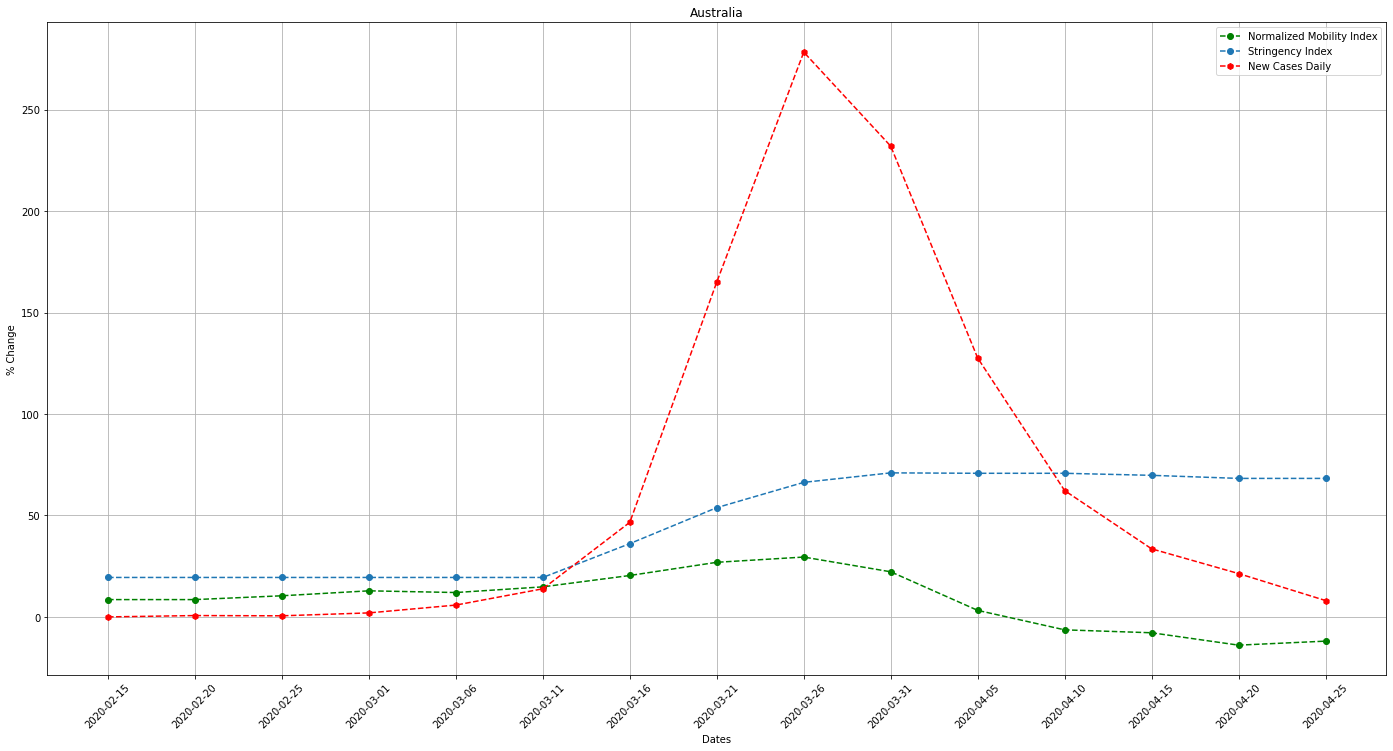

In [240]:
plot_country(df,policy_data,'Australia')

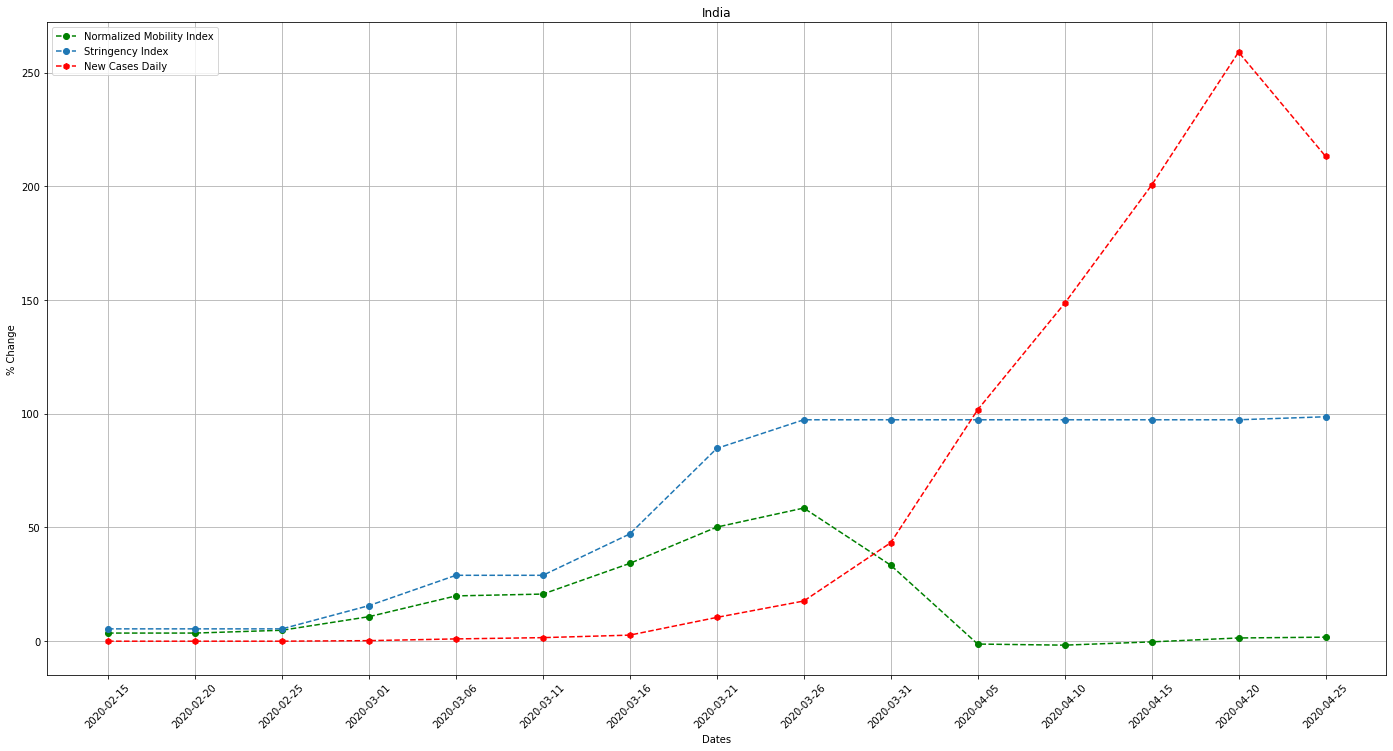

In [233]:
plot_country(df,policy_data,'India')

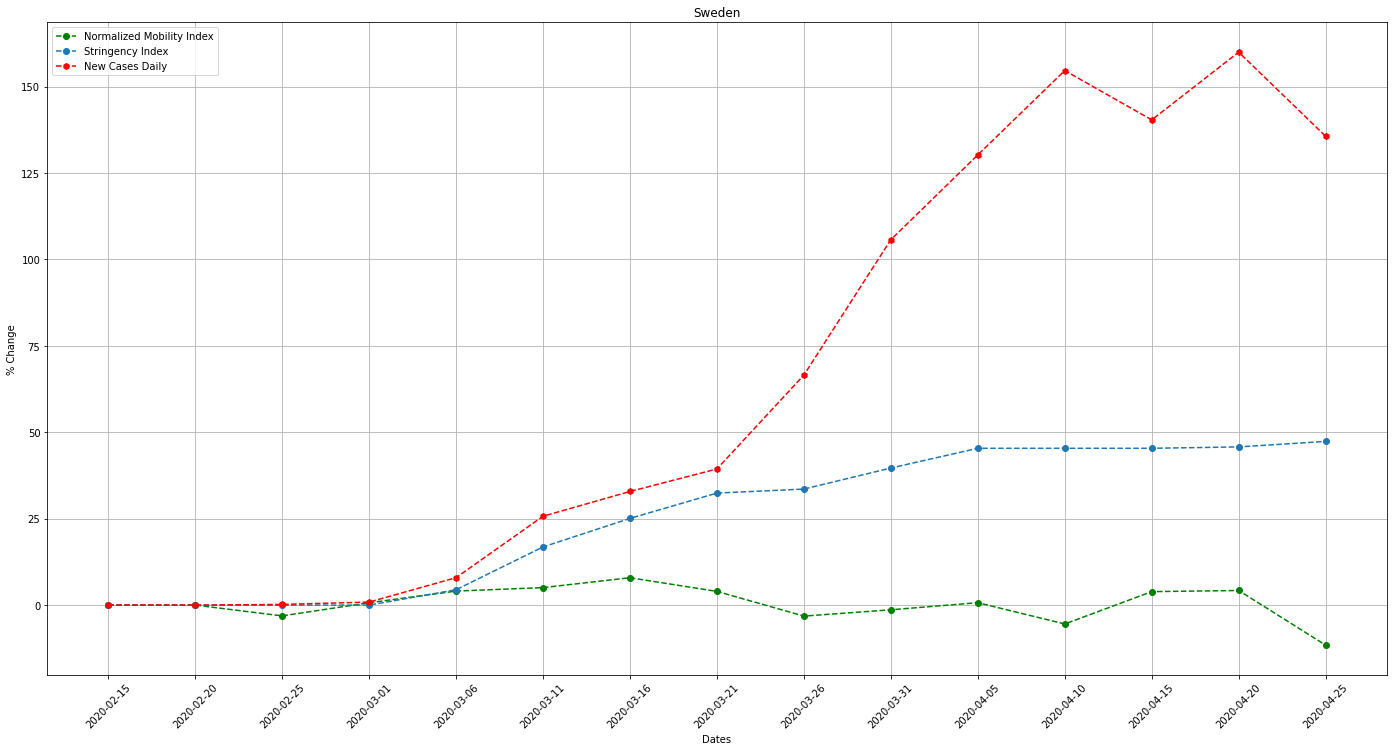

In [234]:
plot_country(df,policy_data,'Sweden')

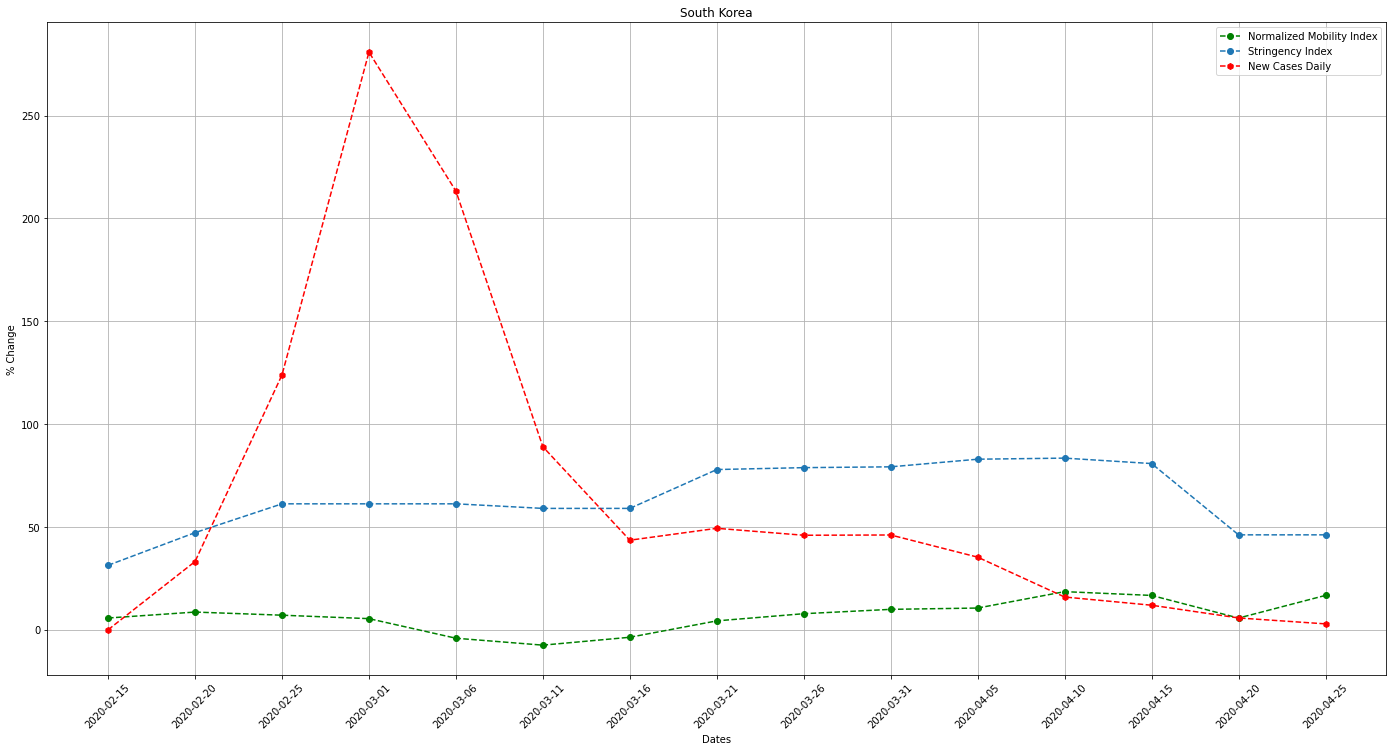

In [235]:
plot_country(df,policy_data,'South Korea')

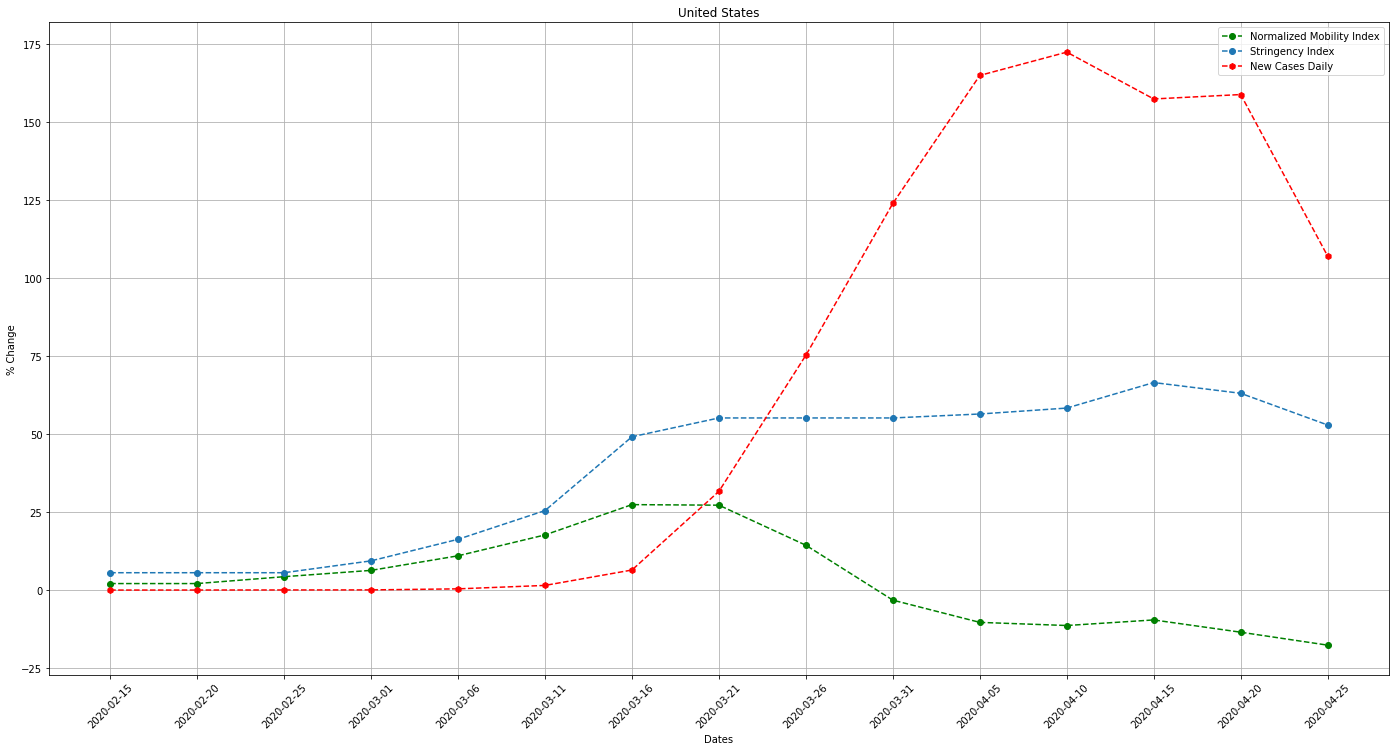

In [236]:
plot_country(df,policy_data,'United States')